# Notebook TP3 Optimisation  
# DAI Yucheng - ADJAL Massyl

## Import des librairies :

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import importlib
import TP3_main as main
importlib.reload(main)

<module 'TP3_main' from 'd:\\Work Life\\Studies\\M1 ISI\\S1\\3 - Optimisation\\OPT - TP3\\TP3_main.py'>

## Première partie :
### 1.1 : Tracer les isovaleurs de la fonction J

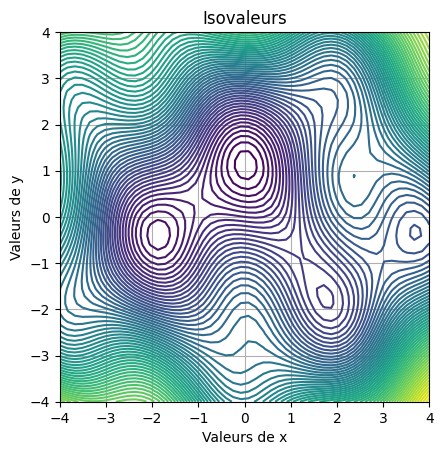

In [123]:
# Définition du domaine de tracé
xmin, xmax, nx = -4, 4, 50 # max value, min value, sample size of X
ymin, ymax, ny = -4, 4, 50 # max value, min value, sample size of Y

x1d = np.linspace(xmin,xmax,nx) # Generate nx equally spaced x-values in the range [xmin, xmax].
y1d = np.linspace(ymin,ymax,ny) # Generate ny equally spaced y-values in the range [ymin, ymax].
x2d, y2d = np.meshgrid(x1d, y1d) ## Generate a 2D grid by meshing网格化 x and y values so that the function value can be calculated at each grid point

# Tracé des isovaleurs de f1
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.show()



### 1.2 :

In [124]:
# Q1.2 déterminer les points critiques de 𝐽, déterminer leur nature

solutions = []                                             # afin de sauvgarder les racine de grad = 0
for x1 in x1d:
    for x2 in y1d:
        sol = main.root(main.GradJ, [x1, x2])
        if sol.success and main.NewSelution(sol.x, solutions): # si root a bien trouvé la racine et c'est pas une raciné existé
            solutions.append(sol.x.tolist()) # alors on le sauvgarde

main.PrintSolutions(solutions)
main.CalMatrix_DeterNature(solutions)
minima = main.FindMinima(main.J,x1d,y1d)
print("Les points minimals par rapport au fct scipy.optimize.minimize:\n",minima,'\n')

solutions = np.array(solutions)
print( "Toutes les solutions:\n",solutions)



racines trouvées：
[-1.8707866131429896, -0.39254327179565207]
[-1.000094474670791, 0.3103021569655692]
[0.024429140235495236, 1.129908430106512]
[3.6994150600381177, -0.3349668900857044]
[1.7571265369501623, -1.749537156922367]
[1.2342058013892714, -0.8789116060185264]
[2.637174736478029, 1.1918062123063133]
[2.408369785012011, 0.8607659433320444]
[2.98550383554998, -0.8792032495782736]

Valeurs propres de la matrice : 
 [17.02749761  0.04584859] 
 [ 0.04584859 10.49082451]
  vp1 = 17.02781918183127
  vp2 = 10.490502943120207
point : [-1.8707866131429896, -0.39254327179565207] is Val min

Valeurs propres de la matrice : 
 [ -5.08356956 -10.78893838] 
 [-10.78893838   4.85268441]
  vp1 = -11.99329915879138
  vp2 = 11.762414016312164
point : [-1.000094474670791, 0.3103021569655692] point selle

Valeurs propres de la matrice : 
 [17.558023    1.07641634] 
 [ 1.07641634 10.24080333]
  vp1 = 17.713085678189657
  vp2 = 10.085740644940536
point : [0.024429140235495236, 1.129908430106512] is V

### 1.3 Use the function "minimize" in the library scipy.optimize  in order to determinate the minimum points of J

In [125]:
main.VerifyPtMin(solutions,minima)

We have already found the point [-1.8707866131429896,-0.39254327179565207] in the solutions found by scipy.optimize.minimize
We have already found the point [0.024429140235495236,1.129908430106512] in the solutions found by scipy.optimize.minimize
We have already found the point [3.6994150600381177,-0.3349668900857044] in the solutions found by scipy.optimize.minimize
We have already found the point [1.7571265369501623,-1.749537156922367] in the solutions found by scipy.optimize.minimize


## Deuxième partie :
### 2.1 :  Gradient à pas fixe

La recherche du minimum à convergé :  True
Le nombre d'itérations :  9
Le dernier point obtenu :  [0.02450994 1.12934791]
J[X_trouvé] :  -5.325165336196809


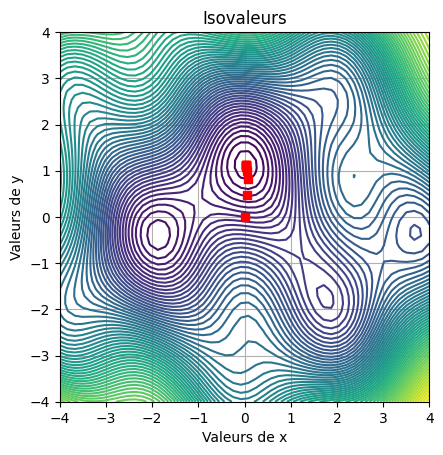

In [126]:
X0 = [0,0]
alpha = 0.06
epsilon = 1e-3
Nmax = 1000 

Xn_vector, Converged = main.Gradient_PasFixe(main.J,main.GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])
print("J[X_trouvé] : ", main.J(Xn_vector[-1]))

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

### 2.2, 2.3 :  tester la convergence par rapport a alpha

La recherche du minimum à convergé :  False
Le nombre d'itérations :  1000
Le dernier point obtenu :  [1.14542012 0.74769786]
J[X_trouvé] :  3.778545644372283


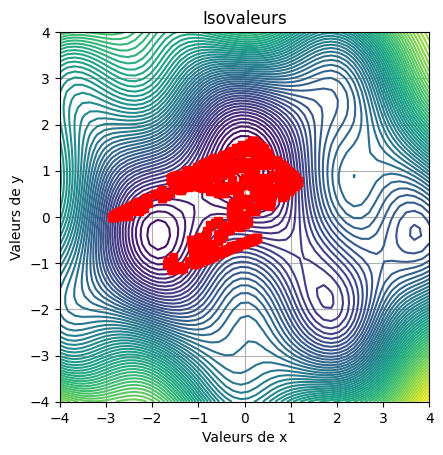

In [127]:
X0 = [0,0]
alpha = 0.2
epsilon = 1e-3
Nmax = 1000 

Xn_vector, Converged = main.Gradient_PasFixe(main.J,main.GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])
print("J[X_trouvé] : ", main.J(Xn_vector[-1]))

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

### 2.4 : changement du point de départ

La recherche du minimum à convergé :  True
Le nombre d'itérations :  10
Le dernier point obtenu :  [-1.87078264 -0.39308134]
J[X_trouvé] :  -3.7598451108881576


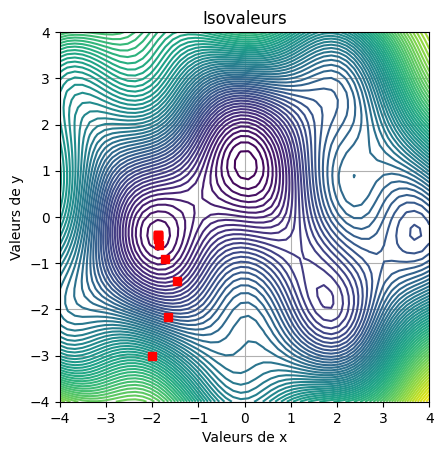

In [128]:
X0 = [-2,-3]
alpha = 0.06
epsilon = 1e-3
Nmax = 1000 

Xn_vector, Converged = main.Gradient_PasFixe(main.J,main.GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])
print("J[X_trouvé] : ", main.J(Xn_vector[-1]))

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

La recherche du minimum à convergé :  True
Le nombre d'itérations :  13
Le dernier point obtenu :  [ 1.75777075 -1.75104451]
J[X_trouvé] :  2.9499744927408162


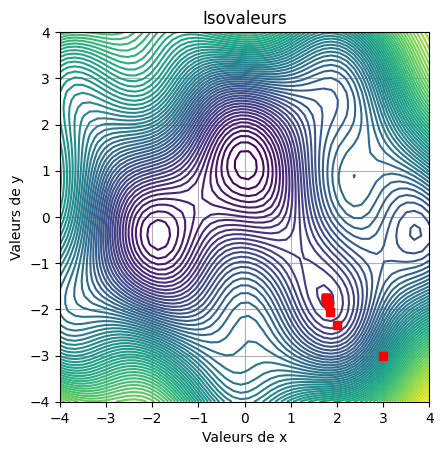

In [129]:
X0 = [3,-3]
alpha = 0.06
epsilon = 1e-3
Nmax = 1000 

Xn_vector, Converged = main.Gradient_PasFixe(main.J,main.GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])
print("J[X_trouvé] : ", main.J(Xn_vector[-1]))

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

Observation : on ne retrouve pas toujours les meme points minima, ceci vient du fait que la fonction presente plusieurs minima locaux, et que l'algorithme converge simplement vers le minima le plus proche. 

### 2.5 : Gradient à pas variable

On calcule le alpha optimal a chaque itération en minimisant  
*J(Xn - (alpha x d1J(Xn)))* avec la fonction scipy.optimize.minimize_scalar

Iteration 1: alpha=0.9999940391390134
Iteration 2: alpha=0.1961018864492463
Iteration 3: alpha=0.6330113482845156
Iteration 4: alpha=0.08390501935397042
Iteration 5: alpha=0.06403405403947625
Iteration 6: alpha=0.08263412611256331
Iteration 7: alpha=0.06376619620473356
La recherche du minimum à convergé :  True
Le nombre d'itérations :  7
Le dernier point obtenu :  [0.02452339 1.12972429]
J[X_trouvé] :  -5.325166720499146


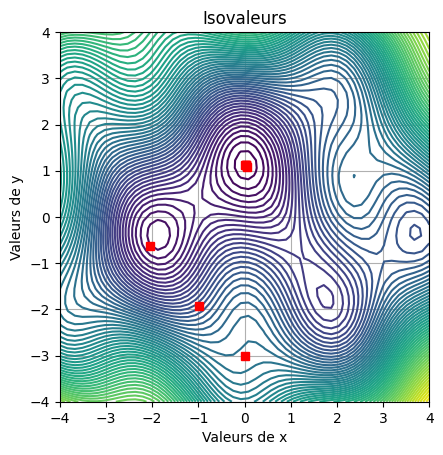

In [130]:
X0 = [0,-3]
epsilon = 1e-3
Nmax = 20

Xn_vector, Converged = main.Gradient_PasOptimal(main.J,main.GradJ,X0,epsilon,Nmax,True)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])
print("J[X_trouvé] : ", main.J(Xn_vector[-1]))

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()

### 2.6 : Méthode de Newton

======= Gradient a pas Fixe =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  20
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.325166953405112

======= Gradient a pas Optimal =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  17
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.3251669534051125

======= Newton =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  5
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.325166953405112



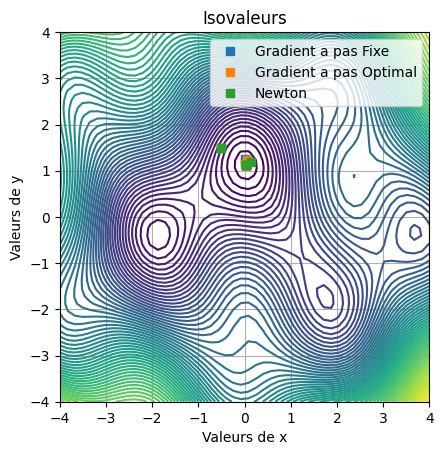

In [131]:
X0 = [-0.5,1.5]
epsilon = 1e-8
Nmax = 1000

Xn_vector_gradientPasFixe, Converged_gradientPasFixe = main.Gradient_PasFixe(main.J,main.GradJ,X0,0.06,epsilon,Nmax)
Xn_vector_gradientPasOptimal, Converged_gradientPasOptimal = main.Gradient_PasOptimal(main.J,main.GradJ,X0,epsilon,Nmax,False)
Xn_vector_newton, Converged_newton = main.Newton(main.J,main.GradJ,main.d2J,X0,epsilon,Nmax)

print("======= Gradient a pas Fixe =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasFixe)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasFixe)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasFixe[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasFixe[-1]))
print("")

print("======= Gradient a pas Optimal =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasOptimal)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasOptimal)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasOptimal[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasOptimal[-1]))
print("")

print("======= Newton =======")
print("La recherche du minimum à convergé : ", Converged_newton)
print("Le nombre d'itérations : ", len(Xn_vector_newton)-1)
print("Le dernier point obtenu : ", Xn_vector_newton[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_newton[-1]))
print("")

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector_gradientPasFixe[:,0],Xn_vector_gradientPasFixe[:,1],'s', label = 'Gradient a pas Fixe')
plt.plot(Xn_vector_gradientPasOptimal[:,0],Xn_vector_gradientPasOptimal[:,1],'s', label = 'Gradient a pas Optimal')
plt.plot(Xn_vector_newton[:,0],Xn_vector_newton[:,1],'s', label = 'Newton')
plt.legend()
plt.show()

======= Gradient a pas Fixe =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  20
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.325166953405112

======= Gradient a pas Optimal =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  8
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.3251669534051125

======= Newton =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  24
Le dernier point obtenu :  [ 3.69941506 -0.33496689]
J[X_trouvé] :  7.84857071063716



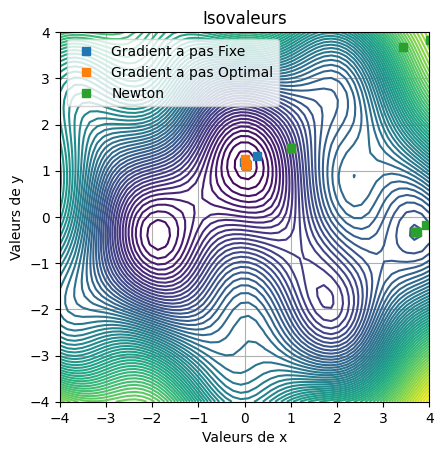

In [132]:
X0 = [1,1.5]
epsilon = 1e-8
Nmax = 1000

Xn_vector_gradientPasFixe, Converged_gradientPasFixe = main.Gradient_PasFixe(main.J,main.GradJ,X0,0.06,epsilon,Nmax)
Xn_vector_gradientPasOptimal, Converged_gradientPasOptimal = main.Gradient_PasOptimal(main.J,main.GradJ,X0,epsilon,Nmax,False)
Xn_vector_newton, Converged_newton = main.Newton(main.J,main.GradJ,main.d2J,X0,epsilon,Nmax)

print("======= Gradient a pas Fixe =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasFixe)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasFixe)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasFixe[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasFixe[-1]))
print("")

print("======= Gradient a pas Optimal =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasOptimal)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasOptimal)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasOptimal[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasOptimal[-1]))
print("")

print("======= Newton =======")
print("La recherche du minimum à convergé : ", Converged_newton)
print("Le nombre d'itérations : ", len(Xn_vector_newton)-1)
print("Le dernier point obtenu : ", Xn_vector_newton[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_newton[-1]))
print("")

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector_gradientPasFixe[:,0],Xn_vector_gradientPasFixe[:,1],'s', label = 'Gradient a pas Fixe')
plt.plot(Xn_vector_gradientPasOptimal[:,0],Xn_vector_gradientPasOptimal[:,1],'s', label = 'Gradient a pas Optimal')
plt.plot(Xn_vector_newton[:,0],Xn_vector_newton[:,1],'s', label = 'Newton')
plt.legend()
plt.show()

======= Gradient a pas Fixe =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  22
Le dernier point obtenu :  [-1.87078661 -0.39254328]
J[X_trouvé] :  -3.7598466295982957

======= Gradient a pas Optimal =======
La recherche du minimum à convergé :  True
Le nombre d'itérations :  15
Le dernier point obtenu :  [0.02442914 1.12990843]
J[X_trouvé] :  -5.3251669534051125

======= Newton =======
La recherche du minimum à convergé :  False
Le nombre d'itérations :  1000
Le dernier point obtenu :  [1.16700357e+50 4.06787418e+49]
J[X_trouvé] :  1.6101113274797446e+100



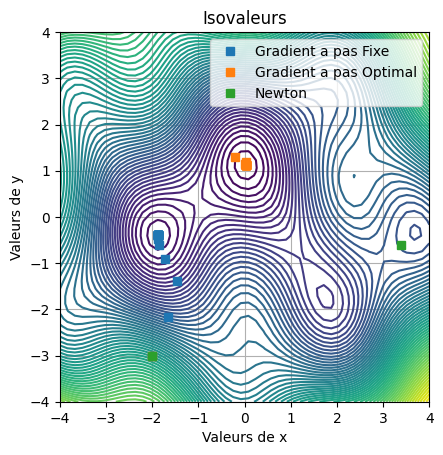

In [133]:
X0 = [-2,-3]
epsilon = 1e-8
Nmax = 1000

Xn_vector_gradientPasFixe, Converged_gradientPasFixe = main.Gradient_PasFixe(main.J,main.GradJ,X0,0.06,epsilon,Nmax)
Xn_vector_gradientPasOptimal, Converged_gradientPasOptimal = main.Gradient_PasOptimal(main.J,main.GradJ,X0,epsilon,Nmax,False)
Xn_vector_newton, Converged_newton = main.Newton(main.J,main.GradJ,main.d2J,X0,epsilon,Nmax)

print("======= Gradient a pas Fixe =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasFixe)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasFixe)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasFixe[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasFixe[-1]))
print("")

print("======= Gradient a pas Optimal =======")
print("La recherche du minimum à convergé : ", Converged_gradientPasOptimal)
print("Le nombre d'itérations : ", len(Xn_vector_gradientPasOptimal)-1)
print("Le dernier point obtenu : ", Xn_vector_gradientPasOptimal[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_gradientPasOptimal[-1]))
print("")

print("======= Newton =======")
print("La recherche du minimum à convergé : ", Converged_newton)
print("Le nombre d'itérations : ", len(Xn_vector_newton)-1)
print("Le dernier point obtenu : ", Xn_vector_newton[-1])
print("J[X_trouvé] : ", main.J(Xn_vector_newton[-1]))
print("")

plt.figure()
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(Xn_vector_gradientPasFixe[:,0],Xn_vector_gradientPasFixe[:,1],'s', label = 'Gradient a pas Fixe')
plt.plot(Xn_vector_gradientPasOptimal[:,0],Xn_vector_gradientPasOptimal[:,1],'s', label = 'Gradient a pas Optimal')
plt.plot(Xn_vector_newton[:,0],Xn_vector_newton[:,1],'s', label = 'Newton')
plt.legend()
plt.show()

#### Conclusion :
dans quelques cas précis la méthode de newton trouve le minimum bien plus rapidement que les methodes du gradient, Cependent dans la plus part des cas la methode de newton ne converge pas (X0 = [-2,-3]) ou bien converge vers un point qui n'est pas minimum comme (X0 = [1,1.5]), ceci est du parceque la methode de newton se base sur la convexité de la fonction J, or ceci n'est pas toujours le cas selon le point de départ X0.

## Troisième Partie
### 3.1 Tracer l'isovaleur de J et la droite

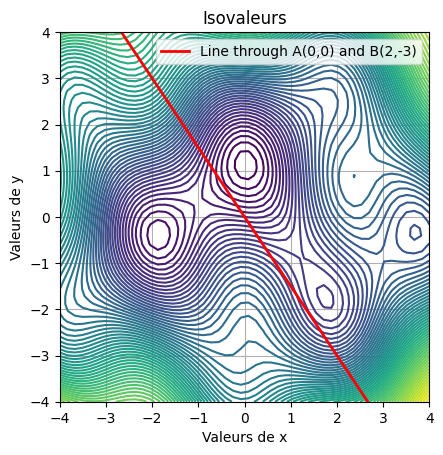

In [134]:
a = [0,0]; b = [2,-3]
y = main.StraightEq(a,b,x1d)

main.ImprimeIsovaleur(main.J,x2d,y2d)
main.DrawStraignt(x1d,y)
plt.show()

D'après les résultats obtenus dans la section 1.2, il y a 2 points minimum le long de la droite passant par (0, 0) et (2, -3) :

\begin{bmatrix}
(0.024429140235495236, 1.129908430106512) \\
(1.7571265369501623, -1.749537156922367)
\end{bmatrix}


Ainsi, nous pouvons estimer visuellement que les points extrêmes sont approximativement :

\begin{bmatrix}
(-0.5, 0.75) \\
(1.5, -2.25)
\end{bmatrix}


### 3.2 Apply the Lagrange multiplier method to solve the problem

Par rapport à la partie 1, on a :
$J(x_{1},x_{2}) = x_{1}^2 + 1,5.x_{2}^2 - 3.sin(2x_{1} + x_{2}) + 5.sin(x_{1} - x_{2})$

et son gradiant est bien : 

$\nabla J(x_{1},x_{2}) = \left(\begin{array}{cc} 
2x_{1} - 6cos(2x_{1} + x_{2}) + 5cos(x_{1} - x_{2})\\
3x_{2} - 3cos(2x_{1} + x_{2}) - 5cos(x_{1} - x_{2})
\end{array}\right)$

Et par rapport les deux points le droite traverse on peut obtenir aussi l'équation du droite et son gradiant:

$l(x_{1},x_{2}) = x_{2} + \frac{3}{2}x_{1}$

$\nabla l(x_{1},x_{2}) = \left(\begin{array}{cc} 
\frac{3}{2}\\
{1}
\end{array}\right)$

On peut donc créer 3 équations afin de construir les équations de Lagrange:

$\left\{
\begin{array}{l}
\frac{\partial J}{\partial x} - \lambda \frac{\partial l}{\partial x} = 0 \\
\frac{\partial J}{\partial y} - \lambda \frac{\partial l}{\partial y} = 0 \\
l(x_{1},x_{2}) = x_{2} + \frac{3}{2}x_{1} = 0
\end{array}
\right.$



In [135]:
initial_guesses = [(-0.5,0.75,0),(1.5,-2.25,0)]
RootLgrgSys = main.RootLagEq(initial_guesses)
for idx, solution in enumerate(RootLgrgSys):
    print(f"Solution {idx+1}: x1 = {solution[0]}, x2 = {solution[1]}")

Solution 1: x1 = -0.44972848483327943, x2 = 0.6745927272499193
Solution 2: x1 = 1.428403791395588, x2 = -2.1426056870933823


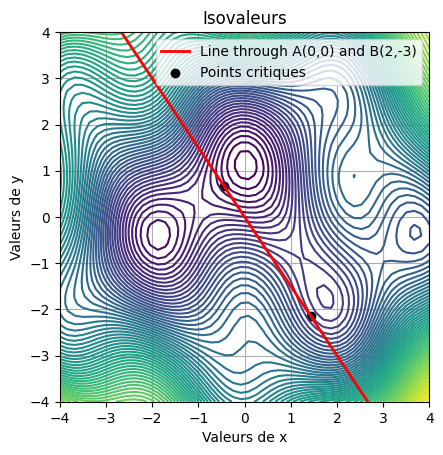

In [136]:
main.ImprimeIsovaleur(main.J,x2d,y2d)
main.DrawStraignt(x1d,y)
critical_points = np.array(RootLgrgSys)
plt.scatter(critical_points[:,0], critical_points[:,1], color='black', label='Points critiques')

# Les solutions trouvées
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Résoudre à nouveau le problème, mais pour la droite ∆′ passant par les points $A(0,1)$ et $B(2, -2)$


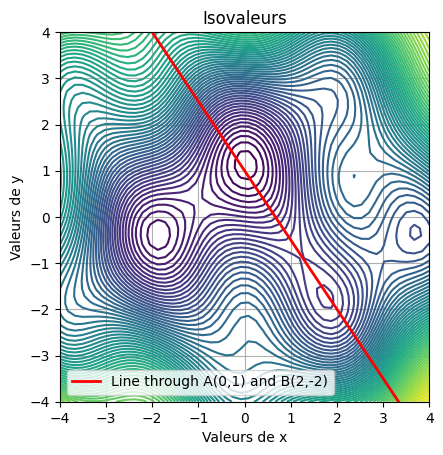

In [137]:
a = [0,1]; b = [2,-2]
y = main.StraightEq(a,b,x1d)

main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(x1d, y, 'r-', label='Line through A(0,1) and B(2,-2)', linewidth=2)  # red straight
plt.legend() 
plt.show()

En raison de ces deux droites ont le même pente $k = -\frac{3}{2}$, donc on n'a que besoin de modifier la $3^{ème
}$
 équation, et aussi choisir 2 point différents. 

Ici, je choisis $(0,1)$ et $(1.75, -2.625)$

In [138]:
def LagrangeEqs2(variables):  # ici, on remplace x1 et x2 dans J par x et y, donc c'est x^2 + 1.5y^2 - 3sin(2x+y) + 5sin(x-y)
    x, y, lambd = variables
    eq1 = 2 * x - 6 * np.cos(2 * x + y) + 5 * np.cos(x - y) - 3 / 2 * lambd  # ∂x/∂J - λ*(∂x/∂Δ')
    eq2 = 3 * y - 3 * np.cos(2 * x + y) - 5 * np.cos(x - y) - lambd  # ∂y/∂J - λ*(∂y/∂Δ')
    eq3 = 3 / 2 * x + y - 1  # l'équation du droite : Δ'
    return [eq1, eq2, eq3]


initial_guesses = [(0,1,0),(1.75,-2.625,0)]

solutions2 = []
for i in initial_guesses:
    solution = scipy.optimize.root(LagrangeEqs2, i)
    if solution.success:
        solutions2.append(solution.x)

for idx, solution in enumerate(solutions2):
    print(f"Solution {idx+1}: x1 = {solution[0]}, x2 = {solution[1]}")

Solution 1: x1 = -0.039581297872668654, x2 = 1.059371946809003
Solution 2: x1 = 1.7985652040476834, x2 = -1.697847806071525


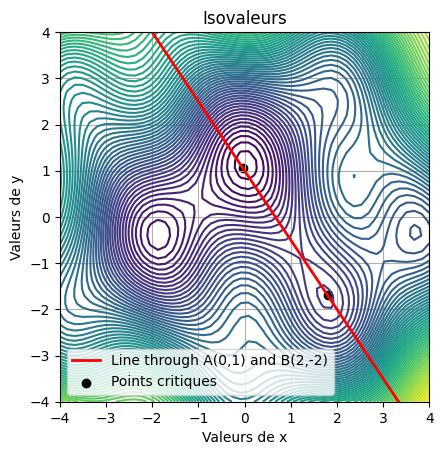

In [139]:
main.ImprimeIsovaleur(main.J,x2d,y2d)
plt.plot(x1d, y, 'r-', label='Line through A(0,1) and B(2,-2)', linewidth=2)  # red straight
plt.legend() 
critical_points = np.array(solutions2)
plt.scatter(critical_points[:,0], critical_points[:,1], color='black', label='Points critiques')

# Les solutions trouvées
plt.legend()
plt.grid(True)
plt.show()